# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.

!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 34.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: ten

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
# from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/AL ML program/Introduction to computer vision/project 5/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/AL ML program/Introduction to computer vision/project 5/Labels.csv')

## Data Overview

In [4]:
labels.head()


,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


### Understand the shape of the dataset

In [5]:
 # Complete the code to check the shape
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


### Observations

* Images is a collection of 4750 color images with three channels, each of size 128x128 pixels.
* labels is the dataset of 4750 items corresponding to labels of the 4750 items in Images

In [6]:
labels.nunique()

Label    12
dtype: int64

In [7]:
labels["Label"].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

### Observations
There are 12 unique labels in the labels dataset namely
- Small-flowered Cranesbill
- Fat Hen
- Shepherds Purse
- Common wheat
- Common Chickweed
- Charlock
- Cleavers
- Scentless Mayweed
- Sugar beet
- Maize
- Black-grass
- Loose Silky-bent

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?

**Answer:**
There are twelve distinct categories of plant images, each distinguished by factors such as species, image clarity, backdrop, angle, magnification, focus, and hue. These categories include:

Small-flowered Cranesbill
Fat Hen
Shepherds Purse
Common wheat
Common Chickweed
Charlock
Cleavers
Scentless Mayweed
Sugar beet
Maize
Black-grass
Loose Silky-bent
These plant categories exhibit various morphological traits that enable differentiation. Each species possesses unique characteristics that facilitate identification.Here's a general description of how these plant categories might differ from each other:

Small-flowered Cranesbill: This plant features small, pinkish-purple flowers and deeply lobed leaves.

Fat Hen: Known for its broad leaves and tall stature, often with white or greenish flowers.

Shepherds Purse: Identified by its purse-shaped seed pods and rosette-forming leaves.

Common Wheat: Recognizable by its tall, slender form and "bearded" grain head.

Common Chickweed: With small, star-shaped white flowers and dense, mat-like growth.

Charlock: Noted for its bright yellow flowers and slightly hairy, toothed leaves.

Cleavers: Characterized by slender stems, narrow leaves, and sticky texture.

Scentless Mayweed: Resembles a typical daisy with white petals and yellow disk but lacks strong scent.

Sugar Beet: Known for its large, hairy, heart-shaped leaves and thick root.

Maize: Tall plant with long, pointed leaves and ears of corn with kernels.

Black-grass: Dark green foliage often found in cultivated fields.

Loose Silky-bent: Features long, slender leaves and a distinctive "bent" posture.



2. Is the dataset provided an imbalance? (Check with using bar plots)

**Answer:**
The bar plot clearly illustrates that the dataset is imbalanced. Notably, categories like "Common Chickweed" and "Loose Silky-bent" exhibit a significantly higher sample count compared to others such as "Common wheat" and "Maize." Specifically, "Loose Silky-bent" stands out with over 600 samples, while "Common Chickweed," "Maize," and several others have notably lower counts, hovering around 200.

This imbalance could potentially affect the performance of a machine learning model trained on this data. It might excel at recognizing the over-represented classes but struggle with the under-represented ones. To address this issue, various resampling techniques can be employed. These methods include over-sampling the minority classes, under-sampling the majority ones, or utilizing synthetic data generation techniques like data augmentation or SMOTE (Synthetic Minority Over-sampling Technique).

In [8]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

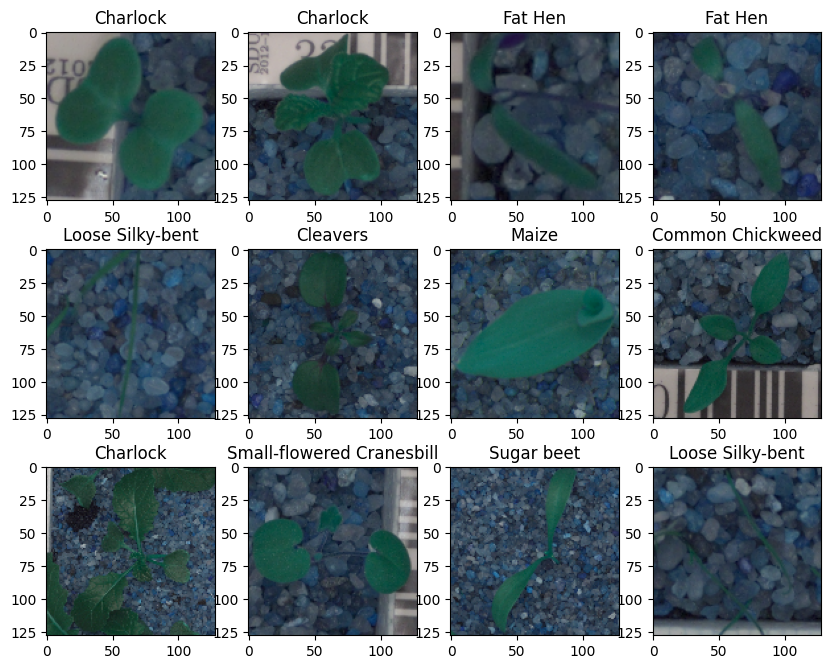

In [9]:
plot_images(images,labels)

**Observations**
Here's a general description of how these plant categories might differ from each other:

* Small-flowered Cranesbill: This plant features small, pinkish-purple flowers and deeply lobed leaves.

* Fat Hen: Known for its broad leaves and tall stature, often with white or greenish flowers.

* Shepherds Purse: Identified by its purse-shaped seed pods and rosette-forming leaves.

* Common Wheat: Recognizable by its tall, slender form and "bearded" grain head.

* Common Chickweed: With small, star-shaped white flowers and dense, mat-like growth.

* Charlock: Noted for its bright yellow flowers and slightly hairy, toothed leaves.

* Cleavers: Characterized by slender stems, narrow leaves, and sticky texture.

* Scentless Mayweed: Resembles a typical daisy with white petals and yellow disk but lacks strong scent.

* Sugar Beet: Known for its large, hairy, heart-shaped leaves and thick root.

* Maize: Tall plant with long, pointed leaves and ears of corn with kernels.

* Black-grass: Dark green foliage often found in cultivated fields.

**Observations***
Loose Silky-bent: Features long, slender leaves and a distinctive "bent" posture.

### Checking the distribution of the target variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

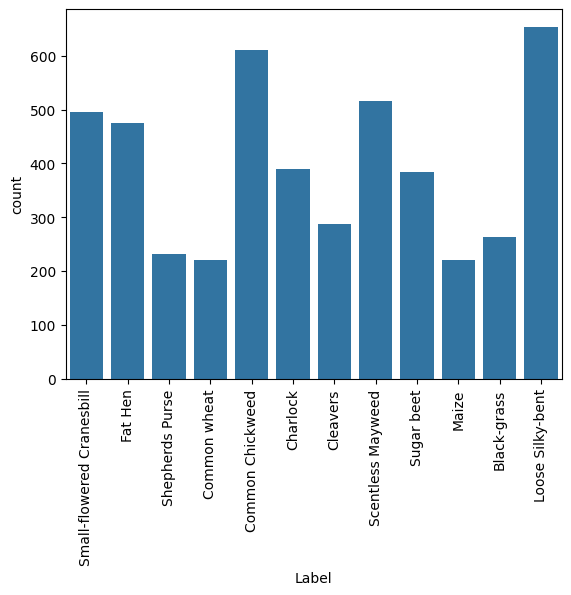

In [10]:
# check for data imbalance
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

**Observations**

The bar plot displays the sample count for various plant categories within the dataset. Data imbalance occurs when the number of observations or samples in each class/category is not evenly distributed. This imbalance can cause a model to favor classes with more observations, leading to poorer performance on classes with fewer observations.

From the bar plot, it's apparent that the dataset suffers from imbalance. For example, categories like "Common Chickweed" and "Loose Silky-bent" exhibit significantly higher sample counts compared to others such as "Common wheat" and "Maize." Specifically, "Loose Silky-bent" stands out with over 600 samples, while "Common Chickweed," "Maize," and several others have notably lower counts, around 200.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In [11]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

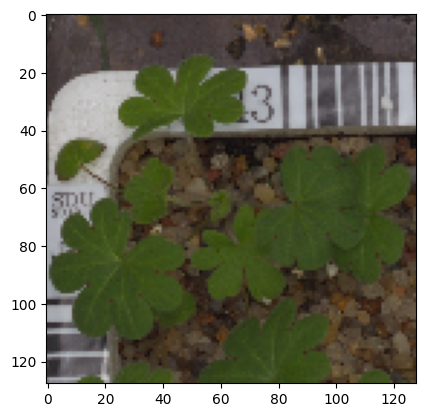

In [12]:
#plot image before resizing
plt.imshow(images[3])

In [13]:
images_decreased=[]
height = 64
width =  64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i],
                                      dimensions,
                                      interpolation = cv2.INTER_LINEAR))

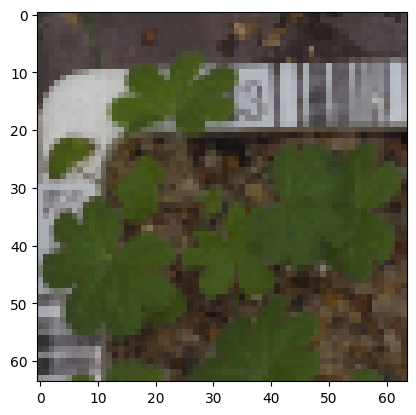

In [14]:
#plot image after resizing
plt.imshow(images_decreased[3])

**Observations**

The downscaled 64x64 image appears pixelated when compared to the original 128x128 image, yet the plant's overall pattern remains recognizable in this specific instance. Nonetheless, this observation may not hold true across all images.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [15]:
#  split the data with test_size as 0.1
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),
                                                  labels,
                                                  test_size =0.1,
                                                  random_state = 42,
                                                  stratify = labels)

# split the data with test_size as 0.1
X_train, X_val, y_train, y_val = train_test_split(X_temp,
                                                  y_temp,
                                                  test_size = 0.1,
                                                  random_state = 42,
                                                  stratify = y_temp)

In [16]:
print("Shape of training set:\n", X_train.shape, y_train.shape)
print("Shape of validation set:\n", X_val.shape,y_val.shape)
print("Shape of testing set:\n", X_test.shape,y_test.shape)

Shape of training set:
 (3847, 64, 64, 3) (3847, 1)
Shape of validation set:
 (428, 64, 64, 3) (428, 1)
Shape of testing set:
 (475, 64, 64, 3) (475, 1)


**Observations**

- As we have low number of images in our dataset, I only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.

### Encode the target labels

In [17]:
# Convert labels from names to one hot vectors using Labelbinarizer which works similar to onehotencoder

#intialize the labelBinarizer
enc = LabelBinarizer()

# Fit and transform y_train
y_train_encoded = enc.fit_transform(y_train)
# Transform y_val
y_val_encoded=enc.transform(y_val)

# Transform y_test
y_test_encoded=enc.transform(y_test)

In [18]:
# Checking the shape of train, validation and test data
y_train_encoded.shape,y_val_encoded.shape,y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

**Observations**
Using LabelBinarizer to transform the labels from their name form into one-hot vectors produced an array with 12 columns, each corresponding to a different plant category.

In [19]:
y_test_encoded


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [20]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

In [21]:
# Clearing backend
backend.clear_session()

In [22]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

 build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>


In [23]:
# Intializing a sequential model
model1 = Sequential()

# C add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

#  add the max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2), padding = 'same'))

#  create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding = 'same'))

#  flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

#  add a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
#  add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# use the Adam Optimizer
opt=Adam()
#  Compile the model
model1.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

#  generate the summary of the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [24]:
# to treat the class imbalance by increasing the weights of the minority classes.
from sklearn.utils import class_weight

labelList = labels.Label.unique()
class_weights = class_weight.compute_class_weight(class_weight = "balanced",
                                                  classes = np.array(labelList),
                                                  y = y_train.values.reshape(-1)
                                                  )
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))
#print calculated class weights
class_weights

{0: 0.7974709784411277,
 1: 0.8348524305555556,
 2: 1.714349376114082,
 3: 1.7909683426443204,
 4: 0.6476430976430977,
 5: 1.0145042194092826,
 6: 1.3818247126436782,
 7: 0.7669457735247209,
 8: 1.0275106837606838,
 9: 1.7909683426443204,
 10: 1.5050860719874803,
 11: 0.604874213836478}

In [25]:
#  fit the model on train and also using the validation data for validation and adding class_weight
history_1 = model1.fit(
            X_train_normalized,
            y_train_encoded,
            epochs = 30,
            validation_data =(X_val_normalized, y_val_encoded),
            batch_size = 32,
            verbose = 2,
            class_weight = class_weights
)

Epoch 1/30
121/121 - 108s - loss: 2.8157 - accuracy: 0.1391 - val_loss: 2.3145 - val_accuracy: 0.2593 - 108s/epoch - 894ms/step
Epoch 2/30
121/121 - 105s - loss: 2.5739 - accuracy: 0.2459 - val_loss: 2.2110 - val_accuracy: 0.2617 - 105s/epoch - 868ms/step
Epoch 3/30
121/121 - 111s - loss: 2.4297 - accuracy: 0.2714 - val_loss: 2.0194 - val_accuracy: 0.2827 - 111s/epoch - 918ms/step
Epoch 4/30
121/121 - 106s - loss: 2.2206 - accuracy: 0.3286 - val_loss: 1.8893 - val_accuracy: 0.3879 - 106s/epoch - 875ms/step
Epoch 5/30
121/121 - 109s - loss: 2.0882 - accuracy: 0.3533 - val_loss: 1.7309 - val_accuracy: 0.4416 - 109s/epoch - 897ms/step
Epoch 6/30
121/121 - 105s - loss: 1.9738 - accuracy: 0.3725 - val_loss: 1.6919 - val_accuracy: 0.4346 - 105s/epoch - 871ms/step
Epoch 7/30
121/121 - 110s - loss: 1.8684 - accuracy: 0.3988 - val_loss: 1.4862 - val_accuracy: 0.5023 - 110s/epoch - 907ms/step
Epoch 8/30
121/121 - 117s - loss: 1.7869 - accuracy: 0.4099 - val_loss: 1.4084 - val_accuracy: 0.5234 - 

**Model Evaluation**

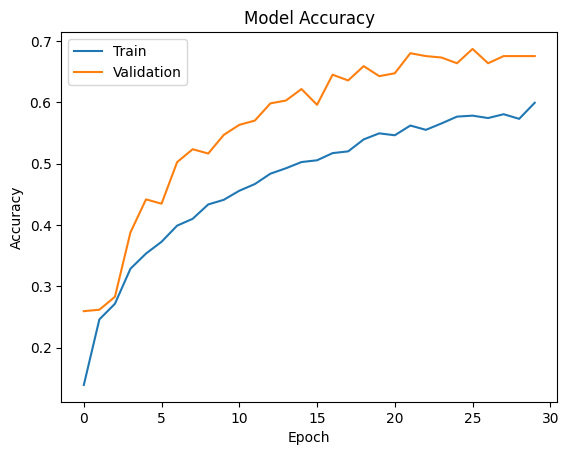

In [26]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations**
* Both training and validation accuracies improve over time, with validation accuracy consistently exceeding training accuracy. This unusual trend suggests potential data distribution differences but not severe overfitting.  
* After 30 epochs, the model achieves approximately 60% accuracy on training and 67% on validation. Although validation loss exceeds training loss, indicating overfitting, final accuracy stabilizes at around 67%. Further improvements may be possible through hyperparameter tuning, data augmentation, or using a more complex model.

**Evaluate the model on test data**

In [27]:
#evaluate the model on test data
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 6s - loss: 1.0795 - accuracy: 0.6947 - 6s/epoch - 420ms/step


**Observations**

* The accuracy of the model on the test data is reported as 69%.

### **Generating the predictions using test data**

In [28]:
#  get the output as probablities for each category
y_pred= model1.predict(X_test_normalized)

15/15 [==============================] - 4s 271ms/step


In [29]:
y_pred

array([[2.8003098e-25, 1.2395488e-31, 5.8020738e-32, ..., 2.6262756e-14,
        3.3038145e-26, 1.5140346e-10],
       [2.1264854e-14, 1.9361001e-03, 2.9823641e-06, ..., 2.6637719e-03,
        9.7441334e-01, 1.4704897e-02],
       [3.6207747e-13, 1.5407674e-03, 8.3475862e-07, ..., 1.3922746e-03,
        9.7148484e-01, 1.6758209e-02],
       ...,
       [1.6313429e-01, 3.5418730e-09, 6.5510817e-06, ..., 8.8246122e-10,
        7.1068769e-09, 1.9596866e-03],
       [1.1750163e-08, 6.7747652e-04, 1.7653262e-03, ..., 2.3396803e-01,
        2.1542285e-06, 9.7695384e-03],
       [2.3916465e-14, 1.5930356e-05, 6.1627270e-06, ..., 4.8732620e-01,
        1.0746194e-02, 5.9489854e-02]], dtype=float32)

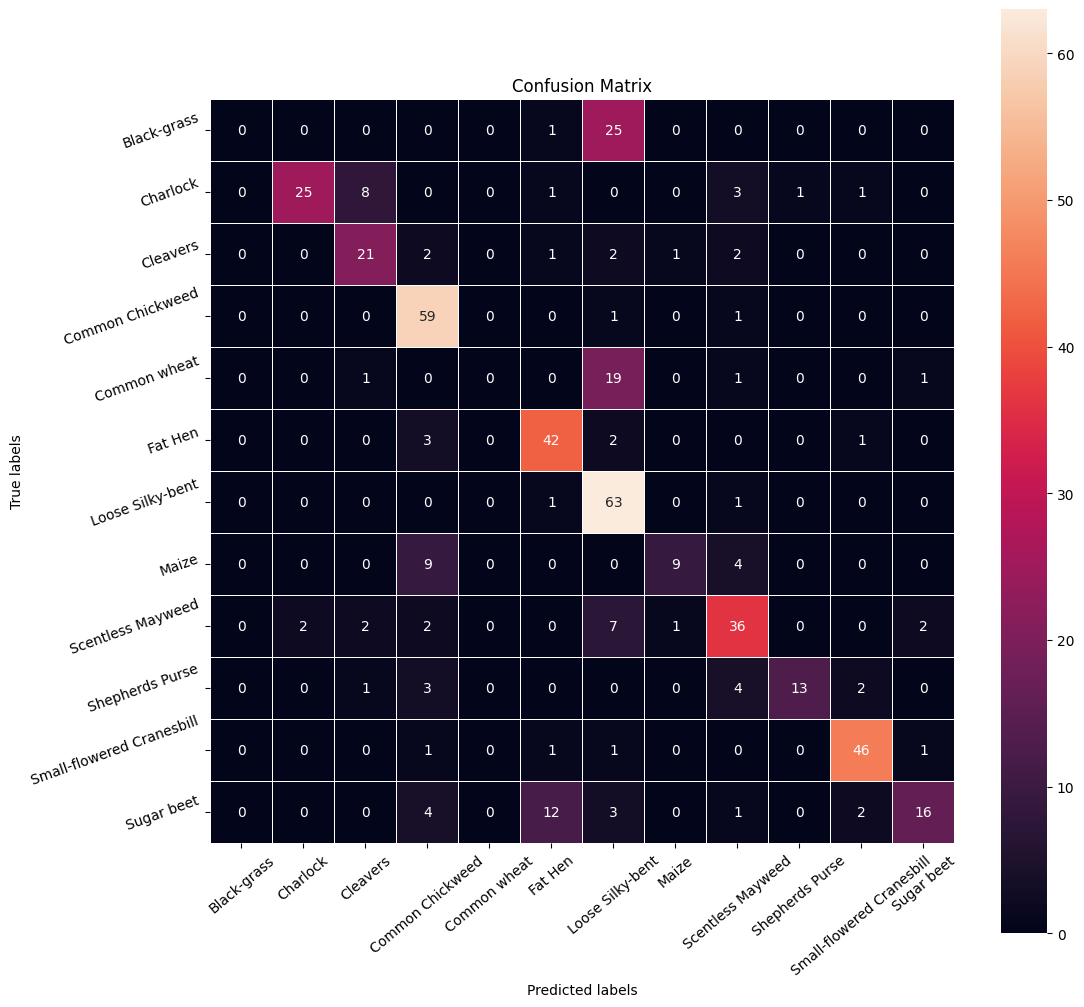

In [30]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Observations**
* The diagonal cells represent the number of correct predictions for each class. High values on the diagonal relative to the corresponding row and column indicate good performance. In the matrix, some classes like 'Charlock',  'Fat Hen', 'Loose Silky-bent', and 'Sugar Beet' have high diagonal values, suggesting that the model performs well in classifying these classes.

* Off-diagonal cells show misclassifications. For example, 'Black-grass' was often misclassified as 'Loose Silky-bent', with a count of 25. Similarly, 'Common Wheat' has been frequently misclassified as 'Loose Silky-bent', with a count of 19. These off-diagonal numbers indicate where the model is confusing one class for another.



When certain classes are frequently mistaken for each other, it suggests that they share similar features or lack clear differences that the model can learn from. To improve this, we can create more unique features or use methods like data augmentation to help the model better distinguish between these classes.

**Plotting Classification Report**

In [32]:
import sklearn.metrics as metrics
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.93      0.64      0.76        39
           2       0.64      0.72      0.68        29
           3       0.71      0.97      0.82        61
           4       0.00      0.00      0.00        22
           5       0.71      0.88      0.79        48
           6       0.51      0.97      0.67        65
           7       0.82      0.41      0.55        22
           8       0.68      0.69      0.69        52
           9       0.93      0.57      0.70        23
          10       0.88      0.92      0.90        50
          11       0.80      0.42      0.55        38

    accuracy                           0.69       475
   macro avg       0.63      0.60      0.59       475
weighted avg       0.66      0.69      0.65       475



**Observations**
* Overall Accuracy: The model has an accuracy of 0.69, meaning it correctly predicted 69% of the total instances across all classes.

* Macro Average: The average precision, recall, and f1-score across all classes without considering support is 0.63, 0.601, and 0.59, respectively. This metric treats all classes equally, regardless of their frequency.

* Weighted Average: The average precision, recall, and f1-score weighted by support is 0.66, 0.69, and 0.65, respectively. This metric accounts for class imbalance by giving more weight to classes with more instances.
* the model performs very well for certain classes (like 1, 3, and 10) but struggles with others (like 0 and 4).

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [33]:
# Monitoring val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [34]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [35]:
# Setting the rotation_range to 20 for the ImageDataGenerator
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [36]:
# Intializing a sequential model
model2 = Sequential()

# Adding the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Initialize Adam Optimimzer
opt=Adam()
# Completing the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

In [37]:
#  fit the model on train data with batch_size=64 and epochs=30
# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,
                     callbacks=[learning_rate_reduction])

Epoch 1/30
60/60 [==============================] - 53s 867ms/step - loss: 2.2240 - accuracy: 0.1895 - val_loss: 2.4254 - val_accuracy: 0.1659 - lr: 0.0010
Epoch 2/30
60/60 [==============================] - 51s 844ms/step - loss: 1.8187 - accuracy: 0.3595 - val_loss: 2.3698 - val_accuracy: 0.2827 - lr: 0.0010
Epoch 3/30
60/60 [==============================] - 51s 850ms/step - loss: 1.5684 - accuracy: 0.4470 - val_loss: 2.1546 - val_accuracy: 0.5350 - lr: 0.0010
Epoch 4/30
60/60 [==============================] - 52s 867ms/step - loss: 1.4491 - accuracy: 0.4798 - val_loss: 2.0103 - val_accuracy: 0.4416 - lr: 0.0010
Epoch 5/30
60/60 [==============================] - 52s 852ms/step - loss: 1.3362 - accuracy: 0.5186 - val_loss: 1.8458 - val_accuracy: 0.3925 - lr: 0.0010
Epoch 6/30
60/60 [==============================] - ETA: 0s - loss: 1.2643 - accuracy: 0.5482
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
60/60 [==============================] - 49s 822ms

**Model Evaluation**

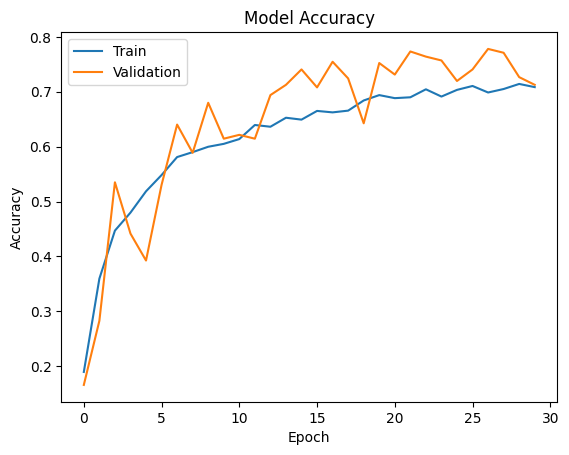

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations**
The graph shows that the validation accuracy surpasses and remains consistently higher than the training accuracy after a certain point. This is an unusual pattern because typically, a model performs slightly better on the training set due to overfitting. In this case, the higher validation accuracy could suggest that the data augmentation or regularization methods are very effective, or there might be a difference in the distribution of data between the training and validation sets.

The reported final metrics indicate a training accuracy of 70.84% and a validation accuracy of 71.% at the 30th epoch which is typically a good sign of generalization, especially when data augmentation is used.

**Evaluate the model on test data**

In [39]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 2s - loss: 0.8954 - accuracy: 0.7137 - 2s/epoch - 133ms/step


**Observations**
The accuracy of the model on the test data is reported as 71.37%.

**Plotting the Confusion Matrix**

In [40]:
# Obtaining the output probabilities
y_pred=model2.predict(X_test_normalized)

15/15 [==============================] - 2s 111ms/step


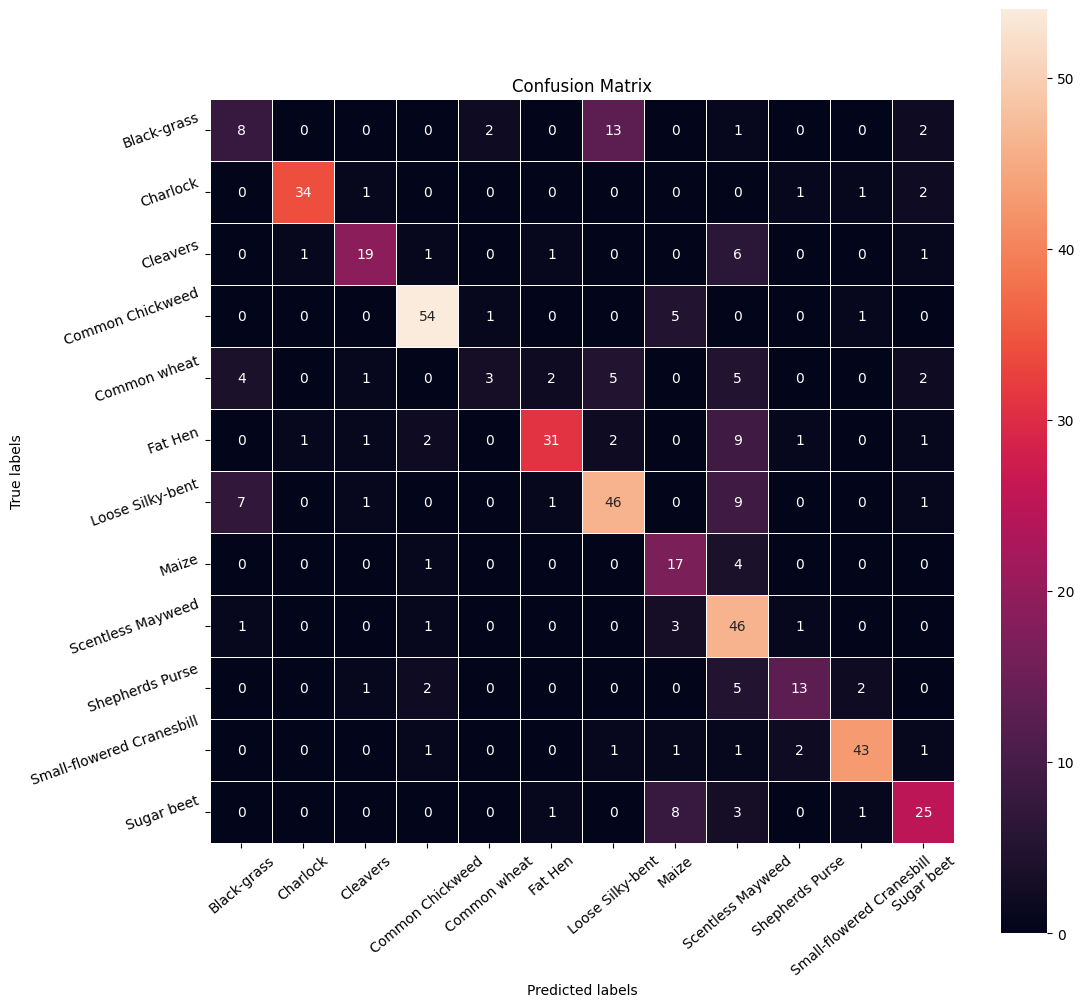

In [41]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined in tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)     # Complete the code to obatin the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_),rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_),rotation=20)
plt.show()

**Observations**
* The model seems to perform well for certain classes, such as 'Charlock', 'Common Chickweed', 'Fat Hen', 'Loose Silky-bent', 'Scentless Mayweed', and 'Sugar Beet', where the numbers on the diagonal (which indicate correct predictions) are relatively high.
* This suggests that the model is effectively recognizing and distinguishing these classes.

**Plotting Classification Report**

In [42]:
# Plotting the classification report
cr=metrics.classification_report(y_test_arg,y_pred_arg)
print(cr)

              precision    recall  f1-score   support

           0       0.40      0.31      0.35        26
           1       0.94      0.87      0.91        39
           2       0.79      0.66      0.72        29
           3       0.87      0.89      0.88        61
           4       0.50      0.14      0.21        22
           5       0.86      0.65      0.74        48
           6       0.69      0.71      0.70        65
           7       0.50      0.77      0.61        22
           8       0.52      0.88      0.65        52
           9       0.72      0.57      0.63        23
          10       0.90      0.86      0.88        50
          11       0.71      0.66      0.68        38

    accuracy                           0.71       475
   macro avg       0.70      0.66      0.66       475
weighted avg       0.73      0.71      0.71       475



**Observations**

* Overall Accuracy: The model correctly predicts classes 71% of the time.

* * Weighted Average Metrics: Reflect consistent performance considering class distribution.
Performance: Strong for most classes, but room for improvement in classes 0, 4, and 9 due to lower recall or precision.

Overall, the model's accuracy is good, but enhancements in class-specific performance could refine its
effectiveness.


## Final Model

When evaluating the performance of the two models, the second model (model2) demonstrates superior overall results, which is employed in the visual representation of the predictions below. Further examination and commentary on this will be presented in the subsequent section on Practical Recommendations and Strategic Advice for the business.

### Visualizing the prediction

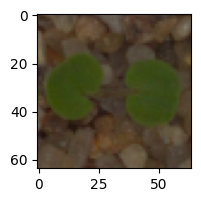

1/1 [==============================] - 0s 50ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


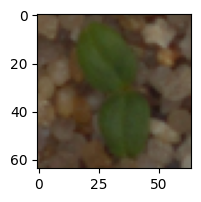

1/1 [==============================] - 0s 48ms/step
Predicted Label ['Cleavers']
True Label Cleavers


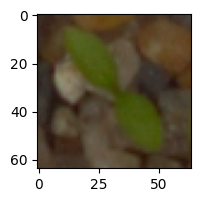

1/1 [==============================] - 0s 56ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


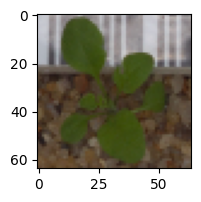

1/1 [==============================] - 0s 43ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [43]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
## Code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
## Code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
## Code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
## Code to predict the test data using the final model selected
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

## Actionable Insights and Business Recommendations

* Class imbalances, where some plant species have fewer samples than others, can hinder training. Techniques like oversampling minority classes, adjusting class weights, or using advanced loss functions such as focal loss can help counterbalance this issue. These methods ensure the model learns to recognize all species equally, improving overall performance.

* Model2, with data augmentation, outperforms Model1. This technique enhances data diversity, improving model generalization.

* Thus, expanding data augmentation is recommended.
* To enhance Model2, recommend training with varied filter sizes and numbers, and increase data augmentation. Adjusting the dropout rate can also optimize performance further.

_____